In [1]:
import sys, os
import source.map
import source.measurement
import source.random_forest
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
species = [(0.05, 130, 0, {2}, (0, 0, 1, 1), 200, 101, 100, 0.01, 0.15, 0),
           (0.15, 130, 1, {0}, (1, 0, 0, 1), 400, 151, 150, 0.01, 0.15, 3),
           (0, 10, 2, set(), (0, 0.8, 0.2, 1), 50, 40, 1000, 0.01, 0.15, 0),
          ]

the_map = source.map.Map([100, 5, 1500], 50, 50, species)

Schéma animé de monde:

<IPython.core.display.Javascript object>


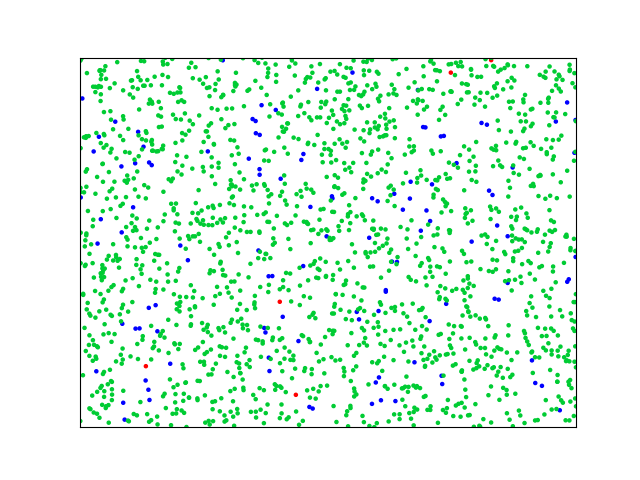

In [4]:
%matplotlib notebook

import numpy as np
import matplotlib.animation as animation

plt.close('all')


fig = plt.figure(5)
ax = plt.axes(xlim=(0, the_map.beings_map.shape[0]), ylim=(0, the_map.beings_map.shape[1]))
scat = ax.scatter([], [], s=60)
plt.xticks([]), plt.yticks([])


def init():
    scat.set_offsets([])

def update(*args):
    positions = []
    colors = []
    for i in range(len(the_map.beings_list)):
        if not the_map.beings_list[i].is_dead:
            positions.append(the_map.beings_list[i].get_position())
            colors.append(the_map.beings_list[i].color)
    scat.set_offsets(positions)
    scat.set_color(colors)
    scat.set_sizes(5 * np.ones(len(the_map.beings_list)))
    the_map.iteration()
    return scat,

anim = animation.FuncAnimation(fig, update, init_func=init, frames=range(100),
                               interval=50)
plt.show()

<IPython.core.display.Javascript object>


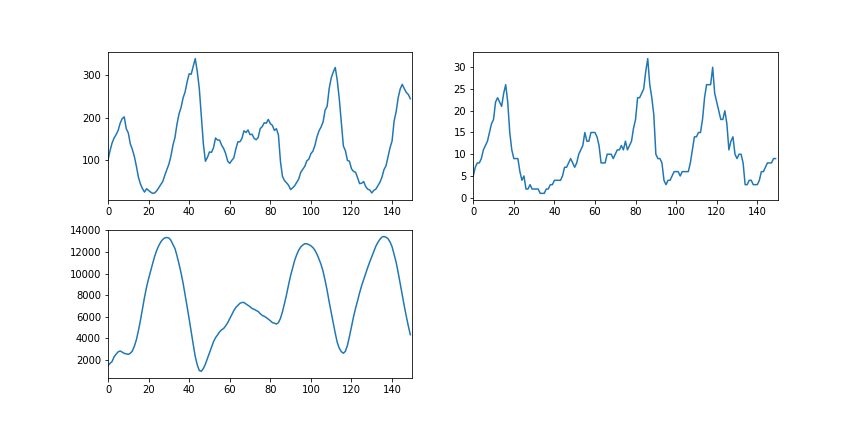

<IPython.core.display.Javascript object>


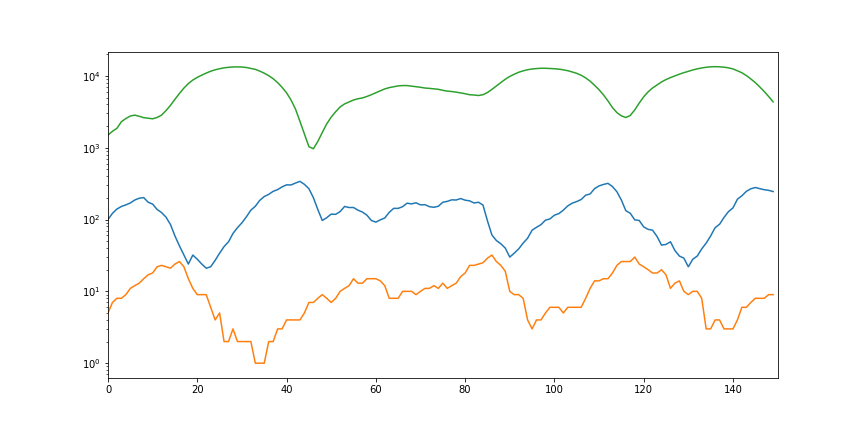

In [37]:
draw_population(the_map,
                150,
                60,
                species_to_draw={0, 1, 2},
                stop_on_extinction=True)

In [4]:
test_result = source.measurement.survival_tests(os.path.join("data", "tests.csv"),
                                               species,
                                               50,
                                               max_iterations=1000,
                                               test_count=1,
                                               inital_beings_number_bounds=[(50, 400), (2, 10), (1000, 6000)],
                                               simulations_per_test=1,
                                               change_satiation_threshold=True,
                                               change_reproduction_threshold=True,
                                               change_reproduction_cooldown=True,
                                               change_inital_satiation=True,
                                               change_hunt_range=True,
                                               stop_hour=9);

In [6]:
data = pd.read_csv(os.path.join("data", "tests.csv"))
data

,species 0 inital count,species 1 inital count,species 2 inital count,species 0 inital satiation,species 0 satiation threshold,species 0 reproduction cooldown,species 0 reproduction threshold,species 0 hunt range,species 1 inital satiation,species 1 satiation threshold,species 1 reproduction cooldown,species 1 reproduction threshold,species 1 hunt range,species 2 inital satiation,species 2 satiation threshold,species 2 reproduction cooldown,species 2 reproduction threshold,species 2 hunt range,result
0,334,7,2827,205.683126,255.324825,80.967024,179.790214,2,316.476809,384.062176,366.157637,121.699370,2,10.915952,25.732251,27.145747,1294.301921,-1,196
1,149,6,1487,284.007021,226.870452,105.042777,135.255512,1,221.961927,505.045884,312.210464,182.719921,1,22.263899,61.538665,29.776254,1882.883902,2,1000
2,168,3,2128,129.768623,421.319913,178.466348,138.011898,2,271.475824,698.716413,186.528719,225.155436,3,8.436720,111.994497,54.980230,1515.990337,-1,1000
